In [2]:
# Problem 1
import tensorflow as tf
hello = tf.constant('It works!')
#sess = tf.Session() - Disabled this code and replaced with code from version TF 1.0 
#sess = tf.compat.v1.Session()
#print(sess.run(hello))

In [3]:
print("The above code does not work becauase 'sessions' are part of TensorFlow 1 and we are using TensorFlow 2. We can verify this by looking at the number of GPU's available, which will be 0 in our case")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version %s" % tf.__version__)

The above code does not work becauase 'sessions' are part of TensorFlow 1 and we are using TensorFlow 2. We can verify this by looking at the number of GPU's available, which will be 0 in our case
Num GPUs Available:  0
TensorFlow version 2.9.1


In [4]:
# Problem2

import tensorflow as tf
import numpy as np

def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.int32)
    return arg


#AND function
def functionAND(input_1, input_2):
    value_1 = my_func(tf.constant(input_1))
    value_2 = my_func(tf.constant(input_2))
    constant = tf.constant(-30, name ="constant")
    result=[]

    for x in range(4):
        result.append(sigmoid((20*value_1.numpy()[x] + 20*value_2.numpy()[x]) + constant))
    return result
    
    
#OR function
def functionOR(input_1, input_2):
    value_1 = my_func(tf.constant(input_1))
    value_2 = my_func(tf.constant(input_2))
    constant = tf.constant(-10, name ="constant")
    result=[]
    
    for x in range(4):
        result.append(sigmoid((20*value_1.numpy()[x] + 20*value_2.numpy()[x]) + constant))
    return result
    
#NOT function
def functionNOT(input_1):
    value_1 = my_func(tf.constant(input_1))
    constant = tf.constant(10, name ="constant")
    result=[]
    
    for x in range(4):
        result.append(sigmoid(constant-(20*value_1.numpy()[x])))
    return result
    

In [5]:
print("Output - AND")
print(functionAND([0, 0, 1, 1], [0, 1, 0, 1]));
print("Output - OR")
print(functionOR([0, 0, 1, 1], [0, 1, 0, 1]));
print("Output - NOT")
print(functionNOT([0,0,1,1]));

Output - AND
[9.35762296883931e-14, 4.5397868702434354e-05, 4.5397868702434354e-05, 0.9999546021312976]
Output - OR
[4.5397868702434354e-05, 0.9999546021312976, 0.9999546021312976, 0.9999999999999064]
Output - NOT
[0.9999546021312976, 0.9999546021312976, 4.5397868702434354e-05, 4.5397868702434354e-05]


In [6]:
#Problem3
def functionXNOR(input_1, input_2):
    #val1 = tf.constant(val1, name = "val1")
    #val2 = tf.constant(val2, name = "val2")
    
    value_1 = my_func(tf.constant(input_1))
    value_2 = my_func(tf.constant(input_2))
    
    #Get the result of x1 AND x2
    result1 = functionAND(value_1,value_2)
    
    #Get the result of (NOT x1) AND (NOT x2)
    result2 = functionAND([round(num) for num in functionNOT(value_1)],[round(num) for num in functionNOT(value_2)])
    
    #Get the OR for the above two results to get XNOR 
    result = functionOR([round(num) for num in result1],[round(num) for num in result2])
    return result;

In [7]:
print("Output - XNOR")
print(functionXNOR([0, 0, 1, 1], [0, 1, 0, 1]));

Output - XNOR
[0.9999546021312976, 4.5397868702434354e-05, 4.5397868702434354e-05, 0.9999546021312976]


The strongest positive correlation with MPG values is Model_Year
0.717114916609996
The strongest negetive correlation with MPG values is Weight
-0.8519581165383477
Covariannce Matrix
[[1436077.10204082 1511438.68367347 1406030.42857143 ...  938771.20408163
  1077346.75510204 1116592.6122449 ]
 [1511438.68367347 1590926.74489796 1479928.         ...  987754.85306122
  1133441.30204082 1174717.61632653]
 [1406030.42857143 1479928.         1376689.42857143 ...  918977.54285714
  1054551.25714286 1092959.31428571]
 ...
 [ 938771.20408163  987754.85306122  918977.54285714 ...  614547.16244898
   705497.37877551  731237.29877551]
 [1077346.75510204 1133441.30204082 1054551.25714286 ...  705497.37877551
   810050.37061224  839624.06204082]
 [1116592.6122449  1174717.61632653 1092959.31428571 ...  731237.29877551
   839624.06204082  870282.48489796]]


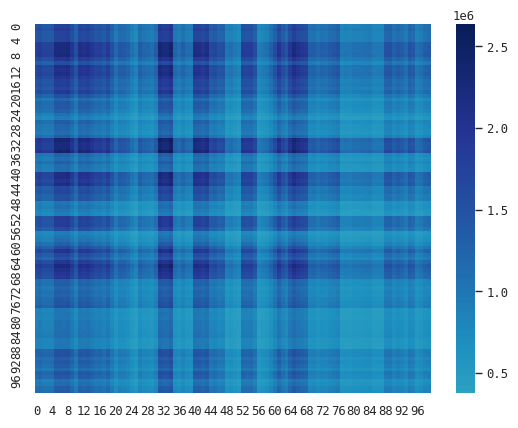

In [8]:
#Problem4
import pandas as pd
from  pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",10)

# Load the datset of metrics for varios car models
file = 'C:\\Praneeth\\HarvardExtensionSchool\\Course3IntroToDeepLEarning\\DeepLearningAssignments\\Week1\\Assignment\\auto_mpg.csv'
autompg = pd.read_csv(file)

#Prepare dataframes for analysis
df = pd.DataFrame(autompg)
df_mpg = df[['MPG']].copy()
df_other = df[['Acceleration','Cylinders','Displacement','Horsepower','Weight', 'Model_Year']].copy()

#Part1: Find strongest positive and negetive correlation betweeen MPG and other coloums.
corr=df_other.corrwith(df_mpg.MPG)
print("The strongest positive correlation with MPG values is Model_Year")
print(corr.Model_Year)
print("The strongest negetive correlation with MPG values is Weight")
print(corr.Weight)

#Part2: Display co-variance matrix
df_covariance = df[['Model_Year','MPG','Acceleration','Cylinders','Displacement','Horsepower','Weight']].copy()
car_array_data = df_covariance.to_numpy()
covariance_matrix = np.cov(car_array_data, bias=True)
print("Covariannce Matrix")
print(covariance_matrix)

#Part3: Heatmap
labels = ['Model_Year','MPG','Acceleration','Cylinders','Displacement','Horsepower','Weight']
sns.set(context="paper", font="monospace")
sns.heatmap(covariance_matrix, fmt='g',center=0, cmap="YlGnBu")
plt.show()

